# Mi primera IA

## 1. Exploracion y análisis de datos (EDA)

In [92]:
import pandas as pd

# Para el histograma
import matplotlib.pyplot as plt

# Para el experimiento
from sklearn.model_selection import train_test_split

# Para el entrenamiento
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler

import seaborn as sns

In [93]:
# Cargar el archivo CSV con los datos de diabetes en un DataFrame
data = pd.read_csv('/content/diabetes.csv')

# Se muestra la tabla
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [94]:
# Primeros 5 registros
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [95]:
# últimos 5 registros
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [96]:
# Información de la tabla
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [97]:
# Información estadística de los datos
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


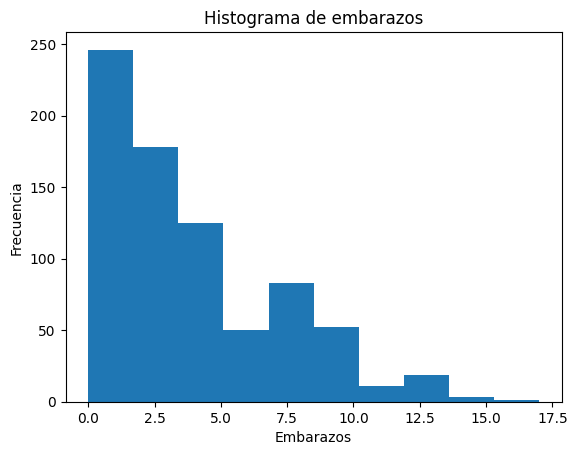

In [98]:
# Histograma embarazos
plt.hist(data['Pregnancies'])
plt.title('Histograma de embarazos')
plt.xlabel('Embarazos')
plt.ylabel('Frecuencia')
plt.show()

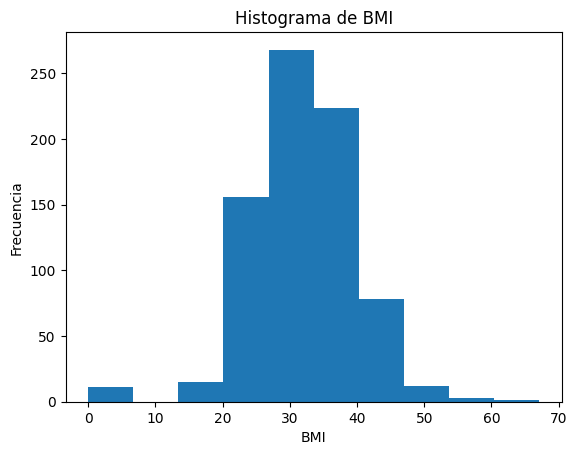

In [99]:
# Histograma BMI
plt.hist(data['BMI'])
plt.title('Histograma de BMI')
plt.xlabel('BMI')
plt.ylabel('Frecuencia')
plt.show()

# Como se comporta el acomodo de datos de manera común

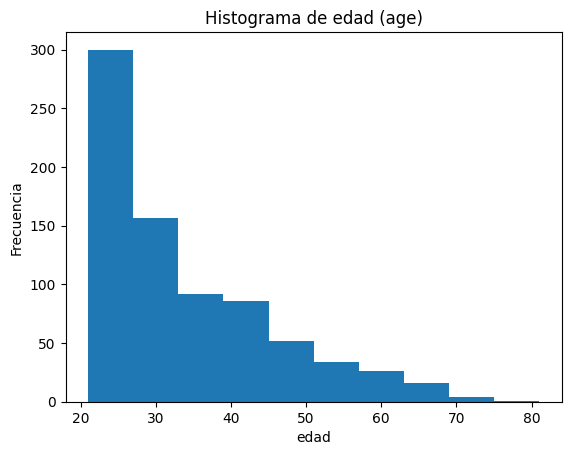

In [100]:
# Histograma edad
plt.hist(data['Age'])
plt.title('Histograma de edad (age)')
plt.xlabel('edad')
plt.ylabel('Frecuencia')
plt.show()

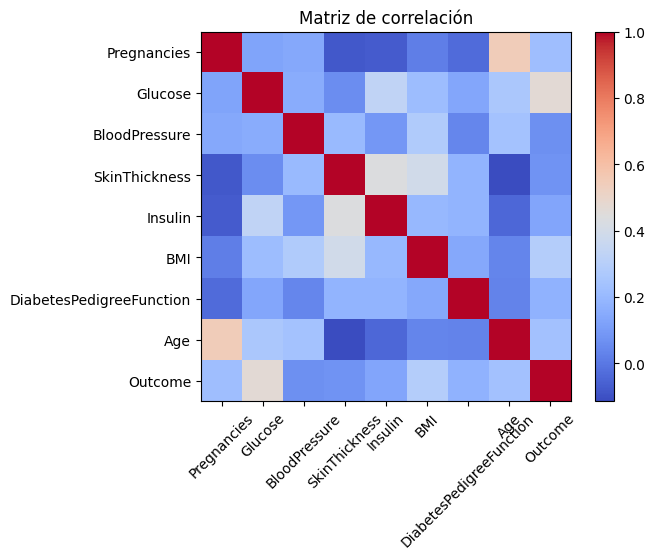

In [101]:
# Matriz de correlación
matriz_correlacion = data.corr()
plt.imshow(matriz_correlacion, cmap="coolwarm", interpolation='nearest')
plt.colorbar()
plt.title('Matriz de correlación')
plt.xticks(range(len(matriz_correlacion.columns)), matriz_correlacion.columns, rotation=45)
plt.yticks(range(len(matriz_correlacion.columns)), matriz_correlacion.columns)
plt.show()

In [102]:
corr_outcome = matriz_correlacion['Outcome'].abs().sort_values(ascending=False)
corr_outcome

# cual es el dato que más influye en outcome

,Outcome
Outcome,1.000000
Glucose,0.466581
BMI,0.292695
Age,0.238356
Pregnancies,0.221898
DiabetesPedigreeFunction,0.173844
Insulin,0.130548
SkinThickness,0.074752
BloodPressure,0.065068


In [103]:
data_pulida = data.drop(columns=['SkinThickness', 'BloodPressure'])
data_pulida

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,0,33.6,0.627,50,1
1,1,85,0,26.6,0.351,31,0
2,8,183,0,23.3,0.672,32,1
3,1,89,94,28.1,0.167,21,0
4,0,137,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...
763,10,101,180,32.9,0.171,63,0
764,2,122,0,36.8,0.340,27,0
765,5,121,112,26.2,0.245,30,0
766,1,126,0,30.1,0.349,47,1


In [104]:
# Pre procesamiento (estandarización)


# Experimento

## División de datos y entrenamiento

> Aqui empieza la clase 3

In [105]:
x = data_pulida.drop(columns=['Outcome']).values
y = data_pulida['Outcome'].values

In [106]:
# Dividir datos
# 4 segmentos de datos: X train, X test, y train, y test

# 70 - 80% de los datos para entrenar
# 20 - 30% de los datos para testear

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
X_train

array([[  9.   , 145.   , 130.   ,  37.9  ,   0.637,  40.   ],
       [ 10.   , 129.   ,   0.   ,  41.2  ,   0.441,  38.   ],
       [  7.   , 102.   , 105.   ,  37.2  ,   0.204,  45.   ],
       ...,
       [ 13.   , 126.   ,   0.   ,  43.4  ,   0.583,  42.   ],
       [  4.   , 171.   ,   0.   ,  43.6  ,   0.479,  26.   ],
       [  9.   , 102.   ,   0.   ,  32.9  ,   0.665,  46.   ]])

In [107]:
# Pre procesamiento (estandarización): siempre va en x, antes o depsues de la división

scaler = StandardScaler()
X_train_escalada = scaler.fit_transform(X_train)
X_test_escalada = scaler.transform(X_test)
X_train_escalada

array([[ 1.51659096,  0.75052361,  0.43749607,  0.79582546,  0.52952571,
         0.56793202],
       [ 1.81201827,  0.24475163, -0.67847404,  1.22865369, -0.06968859,
         0.39844951],
       [ 0.92573636, -0.60873859,  0.22288644,  0.70401341, -0.79424873,
         0.99163829],
       ...,
       [ 2.69830017,  0.14991938, -0.67847404,  1.51720584,  0.36443605,
         0.73741453],
       [ 0.03945446,  1.57240307, -0.67847404,  1.54343785,  0.04648561,
        -0.61844554],
       [ 1.51659096, -0.60873859, -0.67847404,  0.14002512,  0.61512775,
         1.07637954]])

In [108]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

<Axes: >

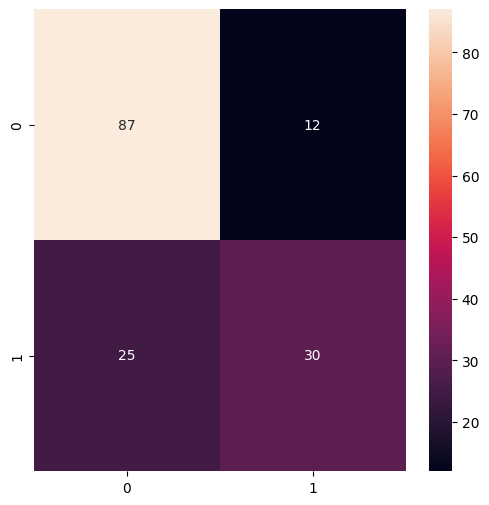

In [109]:
# Paso 1: matriz de confusión (que tanto s equivocó el modelo
matriz = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6, 6))

sns.heatmap(matriz, annot=True, fmt='d')

# plt.imshow(matriz, interpolation='nearest')
# plt.colorbar()
# plt.xticks([0, 1])
# plt.yticks([0, 1])
# plt.xlabel("Etiqueta predicha")
# plt.ylabel("Etiqueta real")
# plt.title("Matriz de confusión")




y -> Reales
x -> predecidos

87 -> Verdadero negativo (No tenian diabetes)
12 -> Falso positivo (Si tenian diabetes)
25 -> Falso negativo
30 -> Verdadero positivo

Le cuesta más trabajo cuando el real es 1 (hay mas FN que FP): está cesgado nuestro train o test


Uso de regresión

ML Supervisado
- Regresión: cuando quieres predecir valores continuos (cualquier numero)
- Clasificación: cuando quieres producir valores discretos (grupo acotado de registros, por ejemplo: aprobado o no aprobado, diabetes 1,2 o 3)

In [115]:
# Para obtener la precisión
reporte = classification_report(y_test, y_pred, output_dict=True)
print(reporte)

# precision: depende de nosotros decir si fue buena o mala
# recall: de todos los que tenian una clasificacion determinada, a cuantos les atino (solo 88% con 0 y 55% con 1)
# f1 score: media armonica resumen de las dos anteriores, mientras mas alto mejor
# support: suma de las muestras (87 +12 y 25 + 30)
# Conclusión: se encesitan más datos, es >50 por lo tanto es viable, pero es para area de la salud, por lo tanto depende del hosputal

{'0': {'precision': 0.7767857142857143, 'recall': 0.8787878787878788, 'f1-score': 0.8246445497630331, 'support': 99.0}, '1': {'precision': 0.7142857142857143, 'recall': 0.5454545454545454, 'f1-score': 0.6185567010309279, 'support': 55.0}, 'accuracy': 0.7597402597402597, 'macro avg': {'precision': 0.7455357142857143, 'recall': 0.7121212121212122, 'f1-score': 0.7216006253969804, 'support': 154.0}, 'weighted avg': {'precision': 0.7544642857142857, 'recall': 0.7597402597402597, 'f1-score': 0.751041746644424, 'support': 154.0}}


In [110]:
# Entrenamiento
model = LogisticRegression()
model.fit(X_train, y_train)
intercept = model.intercept_
intercept # B0

array([-8.64328424])

In [111]:
coef = model.coef_[0]
coef # B1

array([ 0.11869299,  0.03629712, -0.00112965,  0.07710486,  0.66054356,
        0.00714148])

Análisis y evaluación de resultados

In [112]:
y_predecida = model.predict(X_test)
y_predecida

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [113]:
mse = mean_squared_error(y_test, y_predecida)
mse * 100

# Media del error al cuadrado: promedio de todos los errores (diferencia entre el dato real con el dato predecido)
# mse = 1 / n sumatoria hasta n desde i = 1 (yi - )

# mientras mas bajo sea el valor del mse tendremos un mejor rendimiento (se equivoco menos)

# Maximo valor (teorico) del mse = 1

# Error del 16%

24.025974025974026

In [114]:
r2 = r2_score(y_test, y_predecida)
r2 # varianza de nuestros datos
# Que tan bien se ajusta el modelo a los datos
# Mientras más bajo es peor
# Puede salir negativo -> Si sale negativo cuando está muy mal entrenado, cuando los datos son muy diferentes

# Conclusión: el experimento no es correcto, la hipotesis es adecuada, pero el modelo (regresión lineal) no es el correcto


-0.046464646464646764